In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report, roc_auc_score)

In [76]:

df = pd.read_csv('breast-cancer.csv')
X = df.drop(['diagnosis', 'id', 'Unnamed: 0'], axis=1, errors='ignore')  # adjust names
y = df['diagnosis']  # or 'target', etc.
print(df.head())
print(df.columns)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# Split into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [60]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [61]:
#6. Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [62]:
# 7. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.9708


In [73]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[106   1]
 [  4  60]]


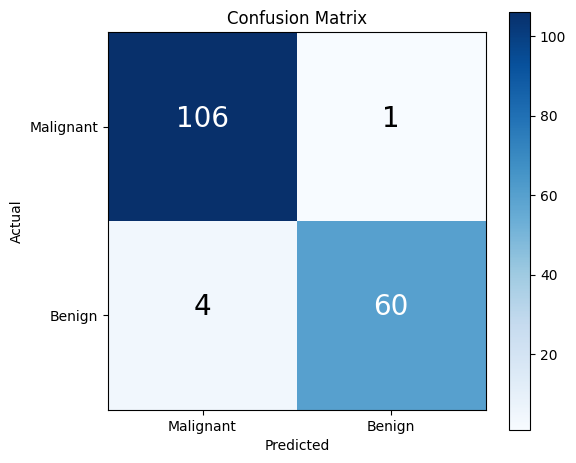

In [74]:

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Malignant', 'Benign'])
plt.yticks(tick_marks, ['Malignant', 'Benign'])

plt.ylabel('Actual')
plt.xlabel('Predicted')

# Add text annotations
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black",
                 fontsize=20)

plt.tight_layout()
plt.show()

In [66]:
# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black",
                fontsize=14)


In [67]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [68]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=['Malignant', 'Benign']))


Classification Report:
              precision    recall  f1-score   support

   Malignant       0.96      0.99      0.98       107
      Benign       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [69]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9975
